# Hands-on 02: Visualização de sinais no tempo (vendo e ouvindo um sinal)

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Praticar geração e plotagem de sinais de áudio no Python;
- Praticar abertura e plotagem de arquivos de áudio no Python.

# Instalação de player VLC

Precisamos instalar o player VLC para dar suporte aos experimentos dessa prática. Assim, em um terminal, digite:

```bash
sudo apt-get update
```

```bash
sudo apt-get install vlc
```

# Prática 1: Geração, reprodução e plotagem de um tom de áudio

**Passo 1:** Abra o Spyder e crie um novo script com o código a seguir e salve-o com o nome **handson2_1.py**

**Passo 2:** Antes de executar o código, troque os endereços dos comandos wv.write() e os.system() para o modelo mostrado abaixo:
```python
som = wv.read('../../MATERIAL/HD_02_MATLAB/sound_01.wav')
wv.write('../../MATERIAL/HD_02_PYTHON/tom_gerado.wav',fs,y)
os.system('cvlc --play-and-exit  ../../MATERIAL/HD_02_PYTHON/tom_gerado.wav')
```
Na verdade, essa mudança depende da pasta que você salvou o script **handson2_1.py**. O melhor é colocar o caminho completo do arquivo **sound_01.wav**.

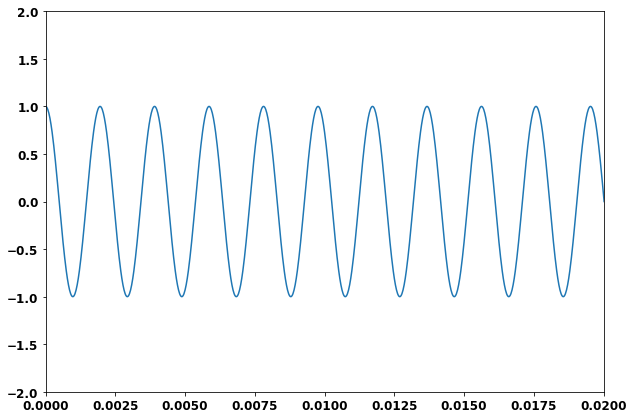

0

In [38]:
import numpy as np           #importando as bibliotecas necessárias:
import matplotlib.pyplot as plt 
import scipy.io.wavfile as wv 
import os

                             # Parâmetros da onda:
tf = 1                       # Tempo de duração da nota
fc = 512                     # Frequência da nota Dó
fs = 100*fc                  # Frequencia de amostragem da nota. 
t =np.arange(0,tf+1/fs,1/fs) # Vetor tempo. Para cada elemento do vetor t, haverá um elemento em y correspondente.
A = 1                        # Amplitude do sinal
y=A*np.cos(2*np.pi*fc*t)     # Sinal senoidal

plt.figure(1,figsize=[10,7]) # cria instância da figura para poder alterar seu tamanho
plt.plot(t,y)                # Visualizar o sinal gerado  
plt.axis([0,0.02,-2,2])      # Zoom para melhor visualização  
plt.show() 

#importando e armazenando o arquivo de áudio numa variável
som = wv.read('./MATERIAL/HD_02_MATLAB/sound_01.wav')

#salvando o tom gerado em um arquivo de extensão .wav :
wv.write('./MATERIAL/HD_02_PYTHON/tom_gerado.wav',fs,y)
#reproduzindo o arquivo

os.system('cvlc --play-and-exit ./MATERIAL/HD_02_PYTHON/tom_gerado.wav') 
#vlc chama o programa VLC Audio Player
#'c' serve para que nenhuma interface seja aberta

### Bibliotecas utilizadas
Como visto no código acima, foram utilizados 'apelidos' para referenciar as bibliotecas, e seus respectivos módulos, no intuito de deixar o código menos verboso.
```python
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io.wavfile as wv 
```
Sem essa prática, o código ficaria com a seguinte aparência:
```python
matplotlib.pyplot.plot(t,y)               
matplotlib.pyplot.axis([0,0.02,-2,2])     
matplotlib.pyplot.show()

som = scipy.io.wavfile.read('./MATERIAL/HD_02_MATLAB/sound_01.wav')
```
#### NumPy
Biblioteca para criação e manipulação de vetores. A função 'numpy.arange' permite a criação de um uma sequência em progressão aritmética. 
```python
t =np.arange(0,tf+1/fs,1/fs)
#parâmetro 1 : início
#parâmetro 2 : fim (embora ela termine a criação 1 passo antes do fim)
#parâmetro 3 : passo
```

#### Matplotlib
Biblioteca para visualização de dados, mais especificamente com o módulo interno Pyplot. A plotagem tem dois comandos essenciais e um opcional:
```python
plt.plot(t,y)   #eixo horizontal e vertical, nessa ordem
plt.axis([0,0.02,-2,2]) #opcional
#primeiro par de números: limites do eixo x
#segundo par de números: limites do eixo y

plt.show() #essencial para exibir a imagem
```
#### SciPy
Contém vários módulos relacionados ao processamento de sinais, estatística, álgebra, entrada e saída de arquivos. Será usada, neste caso, para a escrita da amostra de áudio (.wav):
```python
som ,f_amostragem = wv.read('./MATERIAL/HD_02_MATLAB/sound_01.wav')
#esse é um exemplo de leitura de arquivo, onde o método wv.read retorna a amostra de áudio e sua frequência de amostragem

wv.write('./MATERIAL/HD_02_PYTHON/tom_gerado.wav',fs,y)
#salva a amostra de áudio 'y', a uma frequência de amostragem 'fs', no endereço passado
```

#### OS
Permite a comunicação dos scripts em Python com o sistema operacional em questão. Neste exemplo, será usado para executar um comando como se este fosse executado pelo próprio terminal. A maior vantagem disso é que há uma integração entre a programação em Python e Shell Script. 

```python
os.system('cvlc --play-and-exit ./MATERIAL/HD_02_PYTHON/tom_gerado.wav') 
#'cvlc' chama o programa VLC Audio Player sem abrir sua interface
# o endereço passado é o do áudio a ser aberto
```

#### Sugestão de biblioteca: PyAudio
Existe uma biblioteca própria para o processamento de áudio, com vários outros métodos, incluindo entrada e armazenamento de áudio via microfone. Esta não foi utilizada na prática para evitar funções complicadas desnecessárias para uma funcionalidade simples como a explorada. Confira mais sobre a PyAudio [aqui](https://people.csail.mit.edu/hubert/pyaudio/docs/).


**Passo 2:** Visualize as variáveis criadas no menu _Variable explorer_, ou Explorador de variáveis, do Spyder. <br>
**Passo 3:** Clique com o botão direito do mouse sobre as variáveis e veja as opções de manipulação disponíveis. <br>
**Passo 4:** Para obter outras informações sobre uma função utilizada, ou uma variável (objeto), use o console do IPython no canto inferior direito da tela. Digite o nome do objeto ou função desejado ao lado de uma interrogação e tecle Enter. Por exemplo:
```
np.cos?
```
Você receberá, dentro do próprio console, dados sobre a função 'numpy.cos'. É uma maneira rápida de acessar a documentação da função, análoga ao 'help' do Matlab.

**Passo 5:** Mude o argumento da senoide para gerar a nota Ré, susbtituindo a geração da onda sonora por:
```python
y=A*np.cos(2*(9/8)*np.pi*fc*t)
```
Pode-se perceber que a onda agora está levemente mais aguda. Para qualquer outra nota, podemos reproduzi-la apenas consultando a tabela de notas acima e substituindo a frequência da onda y.

**Para o relatório: ** Tomando como referência a tabela exibida no Hands-On 2 de Matlab, contendo as frequências das notas musicais, gere as respectivas senoides e as plote num gráfico só, como a imagem abaixo mostra:![fig_senoide](./FIGS/HD_02_MATLAB/senoide.jpg)
<br>
**Dica:** A plotagem de múltiplas linhas e suas respectivas legendas pode ser feita da seguinte maneira:
```python
import matplotlib.pyplot as plt

plt.plot(eixo_x,sinal_1)
plt.plot(eixo_x,sinal_2)
plt.plot(eixo_x,sinal_3)
#... até a n-ésima linha/sinal


#alternativamente, em um comando só:
plt.plot(eixo_x,sinal_1,eixo_x,sinal_2,eixo_x,sinal_3)

plt.legend(['legenda 1','legenda 2','legenda 3'])

```
**Passo 6:** Com o botão direito do mouse, clique na variável 'som', no Explorador de Variáveis do Spyder, e escolha a opção Histograma. É uma maneira rápida de plotar o histograma de um vetor de amostras disponibilizada pela interface do Spyder. 

**Passo 7:** Refaça a plotagem do histograma. Dessa vez, ao invés de usar o Explorador de variáveis, digite o seguinte comando no console IPython (canto inferior direito da tela) embutido no Spyder:
```ipython
plt.hist(som[1])
```
**Passo 8:** Aprenda mais sobre o comando plt.show(). Para isso, digite no Console IPython o comando:
```ipython
plt.show?
```
Quando quiser saber mais sobre uma função, método ou objeto sem abrir o navegador para procurar a identação, recorra ao console IPython, digitando sobre o que você quer saber e uma interrogação em seguida, como mostrado no comando acima.

**Passo 9: ** Veja a lista de métodos possíveis de um objeto (variável) do seu código. Para isso, recorra ao Spyder. Após o nome da variável (já inicializada), adicione um ponto e tecle TAB uma vez, então a lista aparecerá. Isso também vale para funções de bibliotecas. Por exemplo: digitando 'plt.' e apertando TAB, você verá todos os comandos possíveis da Pyplot listados.

**OBS.:** Caso você execute o script .py e as variáveis não atualizem, encerre o comando atual no Console IPython, clicando no botão quadrado vermelho que se encontra no canto superior direito do próprio console IPython.  

# Prática 2: Abrindo e reproduzindo arquivos de música

O Python tem biblioteca para abertura, manipulação e gravação de arquivos de áudio. Nesse experimento iremos praticar alguns deles. 

**Passo 1:** Abra o Spyder e crie um script chamado **handson3_1.py** com o seguinte código: <br>
**OBS.:** Mais uma vez, tenha atenção com o endereço da variável soundFile antes de executar o arquivo no Spyder.

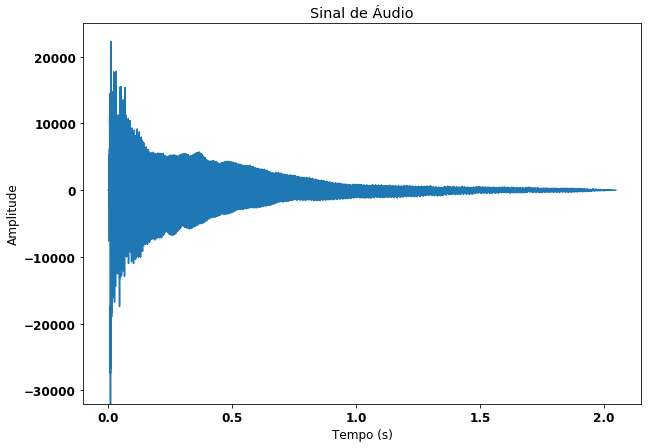

Amostragem:
 Taxa de amostragem =  44100  Hz
 Tempo entre amostras =  2.2675736961451248e-05  Segundos
 
Quantização e Codificação:
 
Informações gerais do arquivo de áudio:
 Número de canais =  (90309,)
 Número de amostras =  90309  amostras
 Duração =  2.0478231292517006  segundos


In [45]:
soundFile = './MATERIAL/HD_02_MATLAB/sound_01.wav'               # Especifica do local e nome do arquivo de áudio

import numpy as np
import scipy.io.wavfile as wv 
import os
import matplotlib.pyplot as plt


dFa,vtSom = wv.read(soundFile)                                   # Abre arquivo de áudio de um arquivo
# vtSom: amplitude das amostras de som
# dFa: frequência de amostrasgem do som (amostragem no tempo)

dta = 1/dFa                                                      # Tempo entre amostras
dTFinal = (len(vtSom)-1)*dta                                     # Tempo da última amostra do sinal de áudio
vtTSom = np.arange(0,dTFinal+dta,dta)                            # Eixo temporal do arquivo de áudio
plt.figure(1,[10,7])
plt.plot(vtTSom,vtSom)                                           # Plota gráfico do áudio

font = {'family' : 'DejaVu Sans','weight' : 'bold','size': 12}   #Configura a fonte do título
plt.rc('font', **font)
plt.title('Sinal de Áudio')                                      # Configura título do gráfico
plt.ylabel('Amplitude')                                          # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')                                          # Configura eixo Y do gráfico
plt.ylim([-32000,25000])
plt.show()

# Reproduz arquivo de áudio
os.system('cvlc --play-and-exit ./MATERIAL/HD_02_MATLAB/sound_01.wav')           
# Mostra informações gerais sobre o arquivo
print('Amostragem:')
print(' Taxa de amostragem = ',dFa,' Hz')
print(' Tempo entre amostras = ',dta,' Segundos')
print(' ')
print('Quantização e Codificação:')
print(' ')
print('Informações gerais do arquivo de áudio:')
print(' Número de canais = ',vtSom.shape)  
print(' Número de amostras = ',len(vtSom),' amostras')
print(' Duração = ',len(vtSom)*dta,' segundos')

### Métodos utilizados

Algumas informações obtidas dos áudios não foram obtidas através de uma biblioteca específica, mas sim pelos próprios métodos da linguagem. 

#### Número de canais (interpretação)

O resultado exibido pela função print parece um pouco confuso à primeira vista. O retorno do método numpy.ndarray.shape retorna uma tupla, estrutura de dados recorrente em Python. É, basicamente, um par imutável ordenado de números, e nesse caso retorna as dimensões horizontais e verticais, respectivamente, do vetor. Como a tupla retornada só possui um elemento (90309), conclui-se que o áudio só tem um canal. Posteriormente, será mostrado um exemplo de áudio com dois canais.

#### Duração

Para obter a duração, bastou coletar o número de amostras, através do método len(), e multiplicar pelo tempo de amostragem.

**Passo 2:**  Salve o script **handson3_1.py** como **handson3_2.py** e incluia a seguinte linha de código após a abertura do arquivo:
```python
vtSom = 4.0*vtSom
```
Em uma versão simplificada, o código ficará como a seguir:

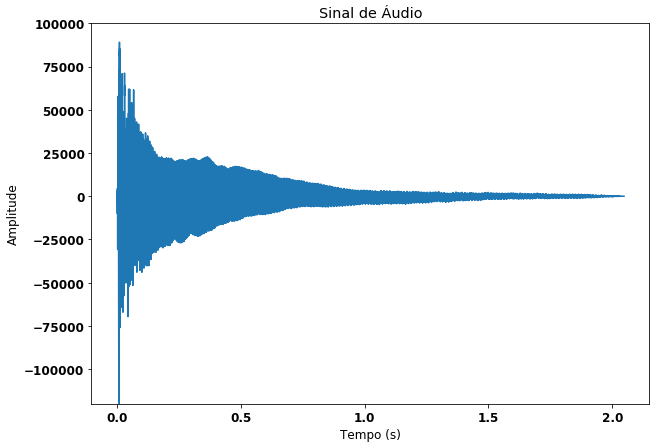

In [43]:
import numpy as np
import scipy.io.wavfile as wv 
import os
import matplotlib.pyplot as plt

soundFile = './MATERIAL/HD_02_MATLAB/sound_01.wav'               # Especifica do local e nome do arquivo de áudio
dFa,vtSom = wv.read(soundFile)                                   # Abre arquivo de áudio de um arquivo
# vtSom: amplitude das amostras de som
# dFa: frequência de amostrasgem do som (amostragem no tempo)
vtSom = 4.0*vtSom
vtSomint16 = vtSom.astype('int16')                               #converte de float64 para int16 para reduzir ruído
wv.write('./MATERIAL/HD_02_PYTHON/4xsound_01.wav',dFa,vtSomint16)#salva amomstra de som para ser reproduzida
#reproduz a amostra de som salva
os.system('cvlc --play-and-exit ./MATERIAL/HD_02_PYTHON/4x_sound_01.wav')           
dta = 1/dFa                                                      # Tempo entre amostras
dTFinal = (len(vtSom)-1)*dta                                     # Tempo da última amostra do sinal de áudio
vtTSom = np.arange(0,dTFinal+dta,dta)                            # Eixo temporal do arquivo de áudio
plt.figure(1,[10,7])
font = {'family' : 'DejaVu Sans','weight' : 'bold','size': 12}   #Configura a fonte do título
plt.rc('font', **font)
plt.plot(vtTSom,vtSom)                                           # Plota gráfico do áudio
plt.title('Sinal de Áudio')                                      # Configura título do gráfico
plt.ylabel('Amplitude')                                          # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')                                          # Configura eixo Y do gráfico
plt.ylim([-120000,100000])                                       # Configura eixo Y do gráfico

plt.show()



**OBS.:** Na linha de código:
```python
vtSomint16 = vtSom.astype('int16')    #converte de float64 para int16 para reduzir ruído
```
foi feito o que se chama de _casting_. Nada mais é que uma conversão entre tipos, e o método astype retorna uma cópia de seu array com o tipo alterado. Foi escolhido o 'int16' porque este não gerava tanta distorção na hora de gravar o arquivo. Vale salientar que os algoritmos de conversão do array para um arquivo .wav está fora do escopo da disciplina, e o tipo dos elementos do array influi tanto no ruído como na duração do tom.


**Sugestão:** Relembre do comando para exportar arquivos .wav (áudio).
```python
wv.write('tom_corrente.wav',fa,y) #grava o tom para reprodução
```
O parâmetro 'fa' seleciona a frequência de amostragem do sinal a ser escrito. 

**Passo 3:** Altere essa variável (dFa) e reproduza os áudios novos para observar os efeitos obtidos. Sugestão: tente as frequências de 60KHz e 22050Hz (metade). 

**Passo 4:** Agora vamos abrir uma música com dois canais e fazer algumas manipulações. Abra um script em branco, salve-o como **handson3_3.py** e incluia o seguinte código: 

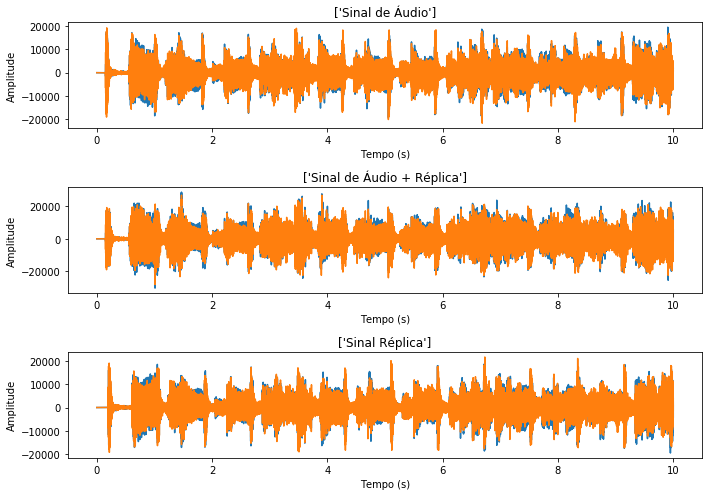

In [2]:
import numpy as np
import scipy.io.wavfile as wv 
import os
import matplotlib.pyplot as plt

soundFile = './MATERIAL/HD_02_MATLAB/sound_02.wav' # Especifica do local e nome do arquivo de áudio
dFa,vtSom = wv.read(soundFile)                     # Abre arquivo
tf = 10                                            # Tempo que deseja tocar o arquivo
amostrasTf = int(np.ceil(tf*dFa))                  # Número de amostras para o tempo especificado
vtSom = vtSom[0:amostrasTf,:]                      # Considera somente as amostras para o tempo especificado
dta = 1/dFa                                        # Tempo entre amostras
dTFinal = (len(vtSom)-1)*dta                       # Tempo da última amostra do sinal de áudio
vtTSom = np.arange(0,dTFinal+dta,dta)              # Eixo temporal do arquivo de áudio
plt.figure(1,[10,7])
plt.subplot(311)
plt.plot(vtTSom,vtSom)                             # Plota gráfico do áudio
plt.title(['Sinal de Áudio'])                      # Configura título do gráfico
plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')                            # Configura eixo Y do gráfico

wv.write('./MATERIAL/HD_02_PYTHON/sem_eco.wav',dFa,vtSom)
os.system('cvlc --play-and-exit ./MATERIAL/HD_02_PYTHON/sem_eco.wav') 

## Modifica o arquivo incluindo eco (uma réplica atrasada do sinal oirginal)
n = 2000                                           # Atraso da réplica do sinal                                                          
eco = np.zeros([len(vtSom),2])
end=len(vtSom)
eco[n:,:] = vtSom[0:end-n,:] 
vtSomEco = np.zeros([len(eco),2])
vtSomEco += eco
vtSomEco += vtSom

wv.write('./MATERIAL/HD_02_PYTHON/com_eco.wav',dFa,vtSomEco.astype('int16'))
os.system('cvlc --play-and-exit ./MATERIAL/HD_02_PYTHON/com_eco.wav') 

plt.subplot(312)                                   # Segundo gráfico do subplot


plt.plot(vtTSom,vtSomEco)                          # Plota gráfico do áudio
plt.title(['Sinal de Áudio + Réplica'])            # Configura título do gráfico
plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')    


plt.subplot(3,1,3)                                 # Terceiro gráfico do subplot
plt.plot(vtTSom,vtSom-vtSomEco)                    # Plota gráfico do áudio
plt.title(['Sinal Réplica'])                       # Configura título do gráfico
plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')                            # Configura eixo Y do gráfico

plt.tight_layout()
plt.show()

**Passo 4: ** Plote o histograma dos sinais vTSom e vTSomEco com a ajuda do Spyder (ver Prática 1, passos 6 e/ou 7).

**Passo 5: ** Escolha outros valores para a variável 'n' no código acima, que determina o ponto de partida do eco. Re-execute o código para ouvir os resultados.

**Para o relatório:** Plote os gráficos acima escolhendo os limites horizontais (apenas o eixo x) para que fique mais evidente, na visualização, o ponto onde a Réplica começa. Essa prática é análoga a dar um zoom no começo do sinal.

**Dica:** Para escolher os limites dos eixos, tanto x quanto y, use os comandos:
```python
plt.xlim([limite_esquerdo,limite_direito])
plt.ylim([limite_inferior,limite_superior])
```